


# **CPE019 : Classifications and Regression**


---


**Name:** QUEJADO,  Jimlord M. <br>
**Course and Section:** CPE019-CPE32S3 <br>
**Date of Submission**: April 9, 2024<br>
**Instructor:** Engr. Roman Richard<br>

---




#Task 1: Classification

## **About the data:**


## Heart Disease Data Set
- A data set about Heart Disease that was donated on 6/30/1988. The goal of this dataset is to create a model to predict the presence of heart disease. 0 will represent the absence while 1 or the presence. The data set has 13 features:


```
1. age - age in years
2. sex - sex (1 = male; 0 = female)
3. cp - chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
5. chol - serum cholestoral in mg/dl
6. fbs - fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
7. restecg- esting electrocardiographic results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest
11. slope - the slope of the peak exercise ST segment
        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping
12. ca - number of major vessels (0-3) colored by flourosopy
13. thal - 3 = normal; 6 = fixed defect; 7 = reversable defect

```


---
### **Dataset Characteristics**
- Multivariate

###**Subject Area**
- Health and Medicine

###**Associated Tasks**
- Classification

###**Feature Type**
- Categorical, Integer, Real

###\# **Instances**
- 303

###\# **Features**
- 13

---

### **Link:**
https://archive.ics.uci.edu/dataset/45/heart+disease

## Loading data set

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sa

## Preprocessing of Data

### Understanding the data

In this section, a simple data exploratory steps are performed

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
#Checking the shape of the data set
X.shape

(303, 13)

In [ ]:
#checking if data was properly loaded
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


In [ ]:
#checking the idata types and non-null counts
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
dtypes: float64(3), int64(10)
memory usage: 30.9 KB


**Remarks:**

Upon first inspection, there are some missing values in the last 3 variables.In addition to that, upon checking on the documentation, some variables are categorical without a ordinal rank. Therefore, preprocessing it would be a necessity.

In [ ]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   num     303 non-null    int64
dtypes: int64(1)
memory usage: 2.5 KB


In [ ]:
unique_values = y['num'].unique()
print(unique_values)

[0 2 1 3 4]


**Remarks:**

The goal of this model is to predict the presence of the hear disease and not to specifically check the severity of the heart disease, thus if the values is greater than 0, it should be considered that the heart has a heart disease.

### Changing Labels of the target variable

In [ ]:
y['num']= y['num'].apply(lambda x: 1 if x > 0 else 0)

<ipython-input-112-8909c36deb4b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['num']= y['num'].apply(lambda x: 1 if x > 0 else 0)


In [ ]:
unique_values = y['num'].unique()
print(unique_values)

[0 1]


### Checking Missing Values


In [ ]:
X.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
dtype: int64

Remarks:

In the data, there are totla of 6 missing data. 4 for the feature ca and 2 for thal. Upon checking, thal or thalassemia feature in this data set shows if the patients heart is normal, fixed defect or  reversable defect. As I am not an expert in the field nor do I have connections to ask, I opted for searching and I cannot find anything that supports that imputing a value on it would be advisable. The same goes with the ca which represents a  number of major vessels (0-3) colored by flourosopy. I think imputing the values would create more bias thus I arbitrarily think that dropping it would be better.



References:

https://www.mayoclinic.org/diseases-conditions/thalassemia/symptoms-causes/syc-20354995

In [ ]:
X = X.dropna().reset_index(drop=True)

y = y.iloc[X.index].reset_index(drop=True)



In [ ]:
X.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

In [ ]:
X.shape, y.shape

((297, 13), (297, 1))

### One hot encoder



In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

onehotencoder=OneHotEncoder()

columnCategorical = ['sex','cp','fbs','restecg','exang','slope','thal' ]

feature_names = []

for col in columnCategorical:
    # Apply one-hot encoding to the current column
    encoded_columns = onehotencoder.fit_transform(X[[col]]).toarray()
    # Create DataFrame from encoded columns
    encoded_df = pd.DataFrame(encoded_columns, columns=onehotencoder.get_feature_names_out([col]))
    # Concatenate encoded DataFrame with original DataFrame
    X = pd.concat([X.drop(columns=[col]), encoded_df], axis=1)



In [ ]:
# Print each column of the resulting DataFrame X
X.head()

,age,trestbps,chol,thalach,oldpeak,ca,sex_0,sex_1,cp_1,cp_2,...,restecg_1,restecg_2,exang_0,exang_1,slope_1,slope_2,slope_3,thal_3.0,thal_6.0,thal_7.0
0,63,145,233,150,2.3,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,67,160,286,108,1.5,3.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,67,120,229,129,2.6,2.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,37,130,250,187,3.5,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,41,130,204,172,1.4,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


Remarks:
Upon checking the documentation, the columns stored in the variable `columnCategorical` are categorical values WITHOUT ranking, therefore, a one hot encoder was peroformed inorder to ensure that the values are not be seen by the model to have an ordinal ranking .


In [ ]:
X.shape

(297, 25)

### Checking for outliers

In [ ]:
X.describe()

,age,trestbps,chol,thalach,oldpeak,ca,sex_0,sex_1,cp_1,cp_2,...,restecg_1,restecg_2,exang_0,exang_1,slope_1,slope_2,slope_3,thal_3.0,thal_6.0,thal_7.0
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,...,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,131.693603,247.350168,149.599327,1.055556,0.676768,0.323232,0.676768,0.077441,0.164983,...,0.013468,0.491582,0.673401,0.326599,0.468013,0.461279,0.070707,0.552189,0.060606,0.387205
std,9.049736,17.762806,51.997583,22.941562,1.166123,0.938965,0.468500,0.468500,0.267741,0.371792,...,0.115462,0.500773,0.469761,0.469761,0.499818,0.499340,0.256768,0.498108,0.239009,0.487933
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,120.000000,211.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,130.000000,243.000000,153.000000,0.800000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,61.000000,140.000000,276.000000,166.000000,1.600000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,3.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Remarks:**

As shown in the .describe() it can be seen in the quartiles that there are some outliers. To further inspect this, a visualization using box plot was performed on the non-categorical features

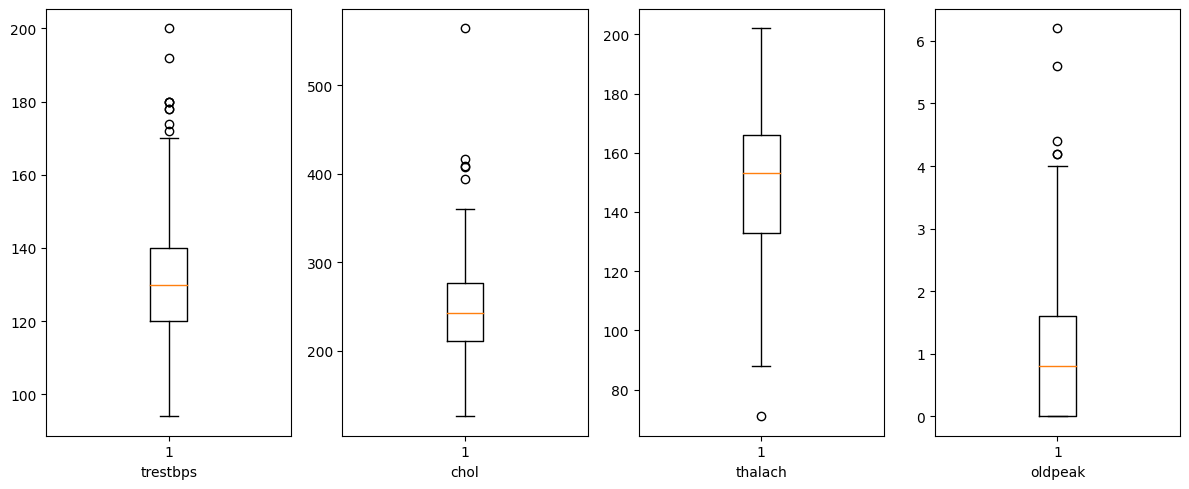

In [ ]:
import matplotlib.pyplot as plt

# Specify the columns you want to include
selected_columns = ['trestbps','chol',	'thalach','oldpeak']

# Filter the DataFrame to include only the selected columns
X_selected = X[selected_columns]

# Create subplots
fig, axs = plt.subplots(1, len(selected_columns), figsize=(12, 5))

# Plot boxplots for each selected column
for i, col in enumerate(selected_columns):
    axs[i].boxplot(X_selected[col])
    axs[i].set_xlabel(col)

plt.tight_layout()
plt.show()


In [ ]:
def IQR_outliers(df, column_name, thresh=1.5):
  Q1 = df[column_name].quantile(0.25)
  Q3 = df[column_name].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - (thresh * IQR)
  upper_bound = Q3 + (thresh * IQR)

  return df[(df[column_name] >= lower_bound) & (df [column_name] <= upper_bound)]

In [ ]:
# Selected columns for analysis
selected_columns = ['trestbps','chol',	'thalach','oldpeak']

# Remove outliers from selected columns
indices_to_keep = np.array([]) # Store indices of rows to keep in X
for col in selected_columns:
    outliers_removed_X = IQR_outliers(X, col)
    indices_to_keep = np.intersect1d(indices_to_keep, outliers_removed_X.index) if indices_to_keep.size else outliers_removed_X.index

# Filter X and y with the indices to keep
X = X.loc[indices_to_keep]
y = y.loc[indices_to_keep]

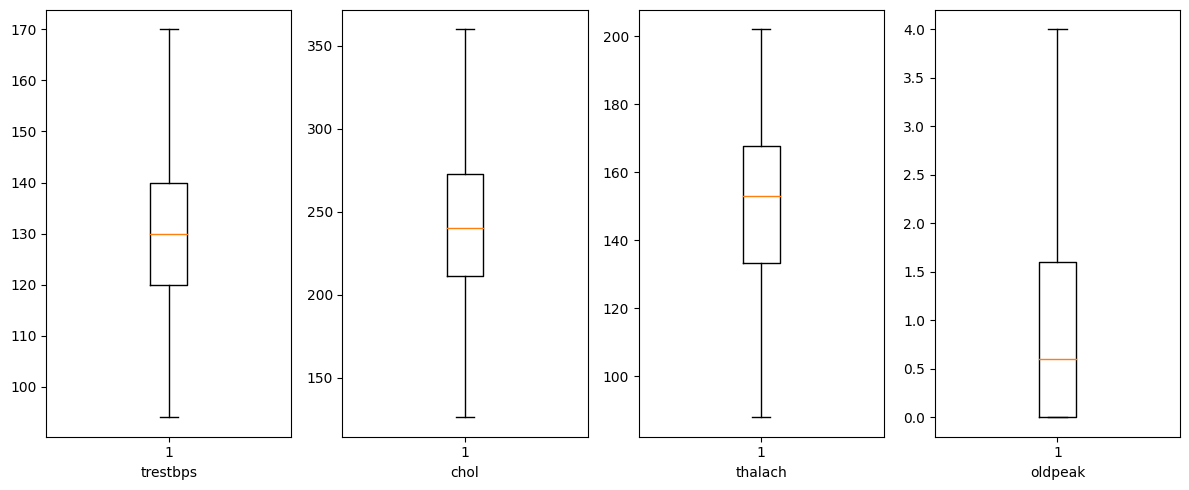

In [ ]:
import matplotlib.pyplot as plt

# Specify the columns you want to include
selected_columns = ['trestbps','chol',	'thalach','oldpeak']

# Filter the DataFrame to include only the selected columns
X_selected = X[selected_columns]

# Create subplots
fig, axs = plt.subplots(1, len(selected_columns), figsize=(12, 5))

# Plot boxplots for each selected column
for i, col in enumerate(selected_columns):
    axs[i].boxplot(X_selected[col])
    axs[i].set_xlabel(col)

plt.tight_layout()
plt.show()


Remarks:


The outliers are successfuly removed and can be processed for standardazation

### Standarding Data Set

In this section, the model was standardized

In [ ]:
from sklearn.preprocessing import StandardScaler

normalize = StandardScaler()
X_norm = normalize.fit_transform(X)

## Model Creation
Goals:

- Create a base model
- Evaluate the model with k-fold cross validation
- Improve the accuracy of your model by applying additional hidden layers



In [ ]:
from keras.models  import Sequential
from keras.layers import Input, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam

### Base model

In [ ]:
def baseModel():
    model = Sequential([
            Dense(16, activation='relu', input_shape=(X_norm.shape[1],)),
            Dense(8, activation='relu'),
            Dense(1, activation='sigmoid')
        ])

    optimizer = Adam(learning_rate = 0.001)
    model.compile(optimizer= optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model


In [ ]:
! pip install scikeras

In [ ]:
from scikeras.wrappers import KerasClassifier
model = KerasClassifier(build_fn=baseModel, epochs=200, batch_size=32, verbose=0)


### Evaluate the model with k-fold cross validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


kfold = KFold(n_splits = 10, shuffle = True)
cv_scores = cross_val_score(model, X_norm, y, cv=kfold, scoring='accuracy')


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras

In [ ]:
print("Baseline: %.2f%% (%.2f%%)" % (cv_scores.mean()*100, cv_scores.std()*100))

Baseline: 54.88% (6.63%)


### Improve the accuracy of your model by applying additional hidden layers

In [ ]:
from scikeras.wrappers import KerasClassifier
def create_improved_model2():
    model = Sequential([
        Dense(32, activation='sigmoid', input_shape=(X_norm.shape[1],)),
        Dropout(0.5),
        Dense(16, activation='sigmoid'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(8, activation='sigmoid'),
        BatchNormalization(),
        Dropout(0.5),

        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Initialize the KerasClassifier with the improved model
improved_model2 = KerasClassifier(build_fn=create_improved_model2, epochs=200, batch_size=32, verbose=0)

# Evaluate the improved model using k-fold cross-validation
improved_cv_scores2 = cross_val_score(improved_model2, X_norm, y, cv=kfold, scoring='accuracy')



/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras

In [ ]:
# Print the baseline accuracy
print("Improved: %.2f%% (%.2f%%)" % (improved_cv_scores2.mean()*100, improved_cv_scores2.std()*100))

Improved: 61.10% (16.37%)


### Remarks:

In the results showed above, the accuracy of the baseline model drastically improved by almost 10%. This proves that by adding more **appropriate** hidden layers will help in increasing the accuracy of the model. In this case, we used a lot of additional hidden layers such as Dropout and Batchnormalization. These two added help in normalizing the inputs of each layer and also preventing overfitting. In this case, it was successful in doing it but nevertheless, the accuracy is still low. The probable reasons is that there are a lot of data that was removed while filtering for outliers that could affect the model training and performance

# TASK 2: Regression



## **About the data:**


## Real Estate Valuation Data Set
- A data set about Real Estate Valuation that was donated on 8/17/2018. The market historical data set of real estate valuation are collected from Sindian Dist., New Taipei City, Taiwan. The goal is to create a regression model for house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared). The features are as follows:

```
1. X1=the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
2. X2=the house age (unit: year)
3. X3=the distance to the nearest MRT station (unit: meter)
4. X4=the number of convenience stores in the living circle on foot (integer)
5. X5=the geographic coordinate, latitude. (unit: degree)
6. X6=the geographic coordinate, longitude. (unit: degree)

```


---
### **Dataset Characteristics**
- Multivariate

###**Subject Area**
- Business

###**Associated Tasks**
- Regression

###**Feature Type**
- Integer, Real

###\# **Instances**
- 414

###\# **Features**
- 6

---

### **Link:**
https://archive.ics.uci.edu/dataset/477/real+estate+valuation+data+set

### **DOI:**
- 10.24432/C5J30W

## Loading data Set

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
real_estate_valuation = fetch_ucirepo(id=477)

# data (as pandas dataframes)
X = real_estate_valuation.data.features
y = real_estate_valuation.data.targets

# metadata
print(real_estate_valuation.metadata)

# variable information
print(real_estate_valuation.variables)


{'uci_id': 477, 'name': 'Real Estate Valuation', 'repository_url': 'https://archive.ics.uci.edu/dataset/477/real+estate+valuation+data+set', 'data_url': 'https://archive.ics.uci.edu/static/public/477/data.csv', 'abstract': 'The real estate valuation is a regression problem. The market historical data set of real estate valuation are collected from Sindian Dist., New Taipei City, Taiwan. ', 'area': 'Business', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 414, 'num_features': 6, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Y house price of unit area'], 'index_col': ['No'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2018, 'last_updated': 'Mon Feb 26 2024', 'dataset_doi': '10.24432/C5J30W', 'creators': ['I-Cheng Yeh'], 'intro_paper': {'title': 'Building real estate valuation models with comparative approach through case-based reasoning', 'authors': 'I. Yeh, Tzu-Kuang Hsu', 'published_

## Preprocessing of Data

### Understanding the data

In this section, basic exploratory was done in order to check the basic information in each data. the `x` will contain all the features and `y` for the target.




In [ ]:
import numpy as np
import pandas as pd

In [ ]:
X.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2012.917,19.5,306.59470,9,24.98034,121.53951
2,2013.583,13.3,561.98450,5,24.98746,121.54391
3,2013.500,13.3,561.98450,5,24.98746,121.54391
4,2012.833,5.0,390.56840,5,24.97937,121.54245


In [ ]:
y.head()

,Y house price of unit area
0,37.9
1,42.2
2,47.3
3,54.8
4,43.1


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 19.5 KB


In [ ]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 1 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Y house price of unit area  414 non-null    float64
dtypes: float64(1)
memory usage: 3.4 KB


**Remarks:**

Upon running the basic exploratory tools, both the feature and target are properly loaded. In the .info() it can be seen that the data types are all numeric, thus there are no need for categorical to numerical conversions. In addition to that, each entry are complete. To make sure, I will still check it using a code that will be shown in the next cells.



### Checking for null values

In [ ]:
X.isnull().sum()

X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
dtype: int64

**Remarks:**

The results matched the results of the .info(), there are no missing values in the data set.

### Checking for outliers


In [ ]:
X.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270


**Remarks:**


As shown in the results, we can see that the Quartile 3 of X3 distance to the nearest MRT station has a significant difference from the maximum. In addition to that the minimum values of X5 latitude and X6 longitde has a huge difference. To further check, a boxplot will be created.

In [ ]:
X.shape

(414, 6)

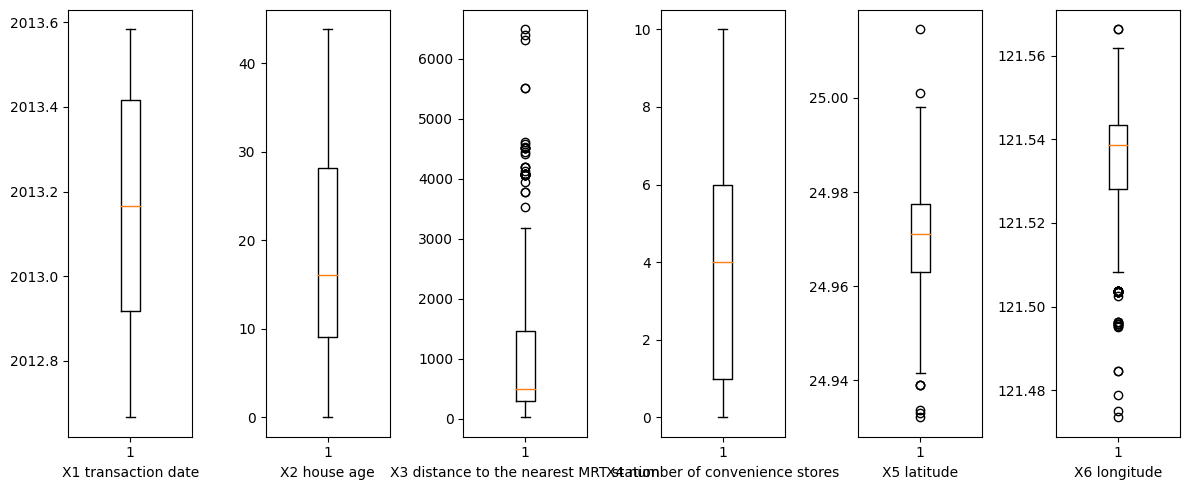

In [ ]:
import matplotlib.pyplot as plt

# Specify the columns you want to include
selected_columns = ['X1 transaction date',	'X2 house age',	'X3 distance to the nearest MRT station',	'X4 number of convenience stores',	'X5 latitude',	'X6 longitude']

# Filter the DataFrame to include only the selected columns
X_selected = X[selected_columns]

# Create subplots
fig, axs = plt.subplots(1, len(selected_columns), figsize=(12, 5))

# Plot boxplots for each selected column
for i, col in enumerate(selected_columns):
    axs[i].boxplot(X_selected[col])
    axs[i].set_xlabel(col)

plt.tight_layout()
plt.show()


**Remarks:**

As mentioned, there are outliers in the said features, To filter this, the outlier removal using quartile approach would be used.

In [ ]:
def IQR_outliers(df, column_name, thresh=1.5):
  Q1 = df[column_name].quantile(0.25)
  Q3 = df[column_name].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - (thresh * IQR)
  upper_bound = Q3 + (thresh * IQR)

  return df[(df[column_name] >= lower_bound) & (df [column_name] <= upper_bound)]

In [ ]:
# Selected columns for analysis
selected_columns = ['X3 distance to the nearest MRT station',	'X5 latitude',	'X6 longitude']

# Remove outliers from selected columns
indices_to_keep = np.array([]) # Store indices of rows to keep in X
for col in selected_columns:
    outliers_removed_X = IQR_outliers(X, col)
    indices_to_keep = np.intersect1d(indices_to_keep, outliers_removed_X.index) if indices_to_keep.size else outliers_removed_X.index

# Filter X and y with the indices to keep
X = X.loc[indices_to_keep]
y = y.loc[indices_to_keep]

In [ ]:
# Print the shape of X and y after removing outliers
print("Shape of X after removing outliers:", X.shape)
print("Shape of y after removing outliers:", y.shape)

Shape of X after removing outliers: (235, 6)
Shape of y after removing outliers: (235, 1)


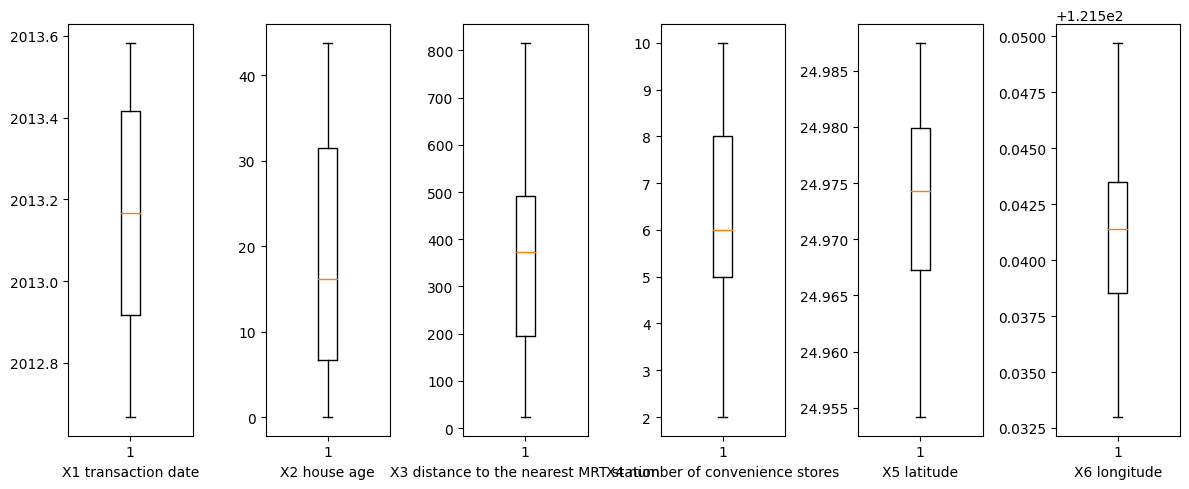

In [ ]:
# Create subplots
selected_columns = ['X1 transaction date',	'X2 house age',	'X3 distance to the nearest MRT station',	'X4 number of convenience stores',	'X5 latitude',	'X6 longitude']
fig, axs = plt.subplots(1, len(selected_columns), figsize=(12, 5))

# Plot boxplots for each selected column
for i, col in enumerate(selected_columns):
    axs[i].boxplot(X[col])
    axs[i].set_xlabel(col)

plt.tight_layout()
plt.show()

**Remarks:**

The outliers are removed successfuly. The data set was significantly reduced from 414 entries to 235. This might affect the accuracy and overall performance of the model as the data set is smaller.

## Creating a base Model


In [ ]:
!pip install scikeras

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
def baseline_model():
	# create model
  model = Sequential()
  model.add(Dense(6, input_shape=(X.shape[1],), kernel_initializer='normal',))
  model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
  model.compile(loss='mean_squared_error', optimizer='adam')
  return model


In [ ]:
#evaluate model
estimator = KerasRegressor(model=baseline_model, epochs=100, batch_size=5, verbose=0)
kfold = KFold(n_splits=10)



In [ ]:
results = cross_val_score(estimator, X, y, cv=kfold, scoring='neg_mean_squared_error')


In [ ]:
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Baseline: -76.19 (28.64) MSE


## Improve the model by standardizing the dataset


In [ ]:
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def standard_baseline_model():
	# create model
  model = Sequential()
  model.add(Dense(6, input_shape=(X.shape[1],), kernel_initializer='normal', activation='relu'))
  model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
  model.compile(loss='mean_squared_error', optimizer='adam')
  return model
# evaluate model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(model=standard_baseline_model, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, X, y, cv=kfold, scoring='neg_mean_squared_error')
print("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Standardized: -65.34 (27.52) MSE


## Show tuning of layers and neurons

- see evaluating small and larger networks

#### Smaller Model

In [ ]:
def smaller_baseline_model():
	# create model
  model = Sequential()
  model.add(Dense(3, input_shape=(X.shape[1],), kernel_initializer='normal', activation='relu'))
  model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
  model.compile(loss='mean_squared_error', optimizer='adam')
  return model

# evaluate model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(model=smaller_baseline_model, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, X, y, cv=kfold, scoring='neg_mean_squared_error')
print("Smaller: %.2f (%.2f) MSE" % (results.mean(), results.std()))


Smaller: -105.54 (61.87) MSE


#### Larger Model

In [ ]:
def larger_baseline_model():
	# create model
  model = Sequential()
  model.add(Dense(18, input_shape=(X.shape[1],), kernel_initializer='normal', activation='relu'))
  model.add(Dense(12, kernel_initializer='normal', activation='relu'))
  model.add(Dense(6, kernel_initializer='normal', activation='relu'))
  model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
  model.compile(loss='mean_squared_error', optimizer='adam')
  return model

# evaluate model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(model=larger_baseline_model, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, X, y, cv=kfold, scoring='neg_mean_squared_error')
print("Larger: %.2f (%.2f) MSE" % (results.mean(), results.std()))


Larger: -60.39 (23.84) MSE


#### Deeper Model

In [ ]:
def Deeper_baseline_model():

	# create model
  model = Sequential()
  model.add(Dense(12, input_shape=(X.shape[1],), kernel_initializer='normal', activation='relu'))
  model.add(Dense(10, kernel_initializer='normal', activation='relu'))
  model.add(Dense(6, kernel_initializer='normal', activation='relu'))
  model.add(Dense(1, kernel_initializer='normal'))

	# Compile model
  model.compile(loss='mean_squared_error', optimizer='adam')
  return model

# evaluate model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(model=Deeper_baseline_model, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, X, y, cv=kfold, scoring='neg_mean_squared_error')
print("Deeper: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Deeper: -56.75 (24.59) MSE


#### Wider Model

In [ ]:
def Wider_baseline_model():
	# create model
  model = Sequential()
  model.add(Dense(20, input_shape=(X.shape[1],), kernel_initializer='normal', activation='relu'))
  model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
  model.compile(loss='mean_squared_error', optimizer='adam')
  return model

# evaluate model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(model=Wider_baseline_model, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, X, y, cv=kfold, scoring='neg_mean_squared_error')
print("Wider: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Wider: -62.37 (24.44) MSE


## **Remarks**

In [ ]:
from tabulate import tabulate

models = ['Baseline', 'Standardized', 'Smaller', 'Larger', 'Deeper', 'Wider']
mse = [-76.19, -65.34, -105.54, -60.39, -56.75, -62.37]
std = [28.64, 27.52, 61.87, 23.84, 24.59, 24.44]

data = []
for i in range(len(models)):
    data.append([models[i], mse[i], std[i]])

headers = ['Model', 'MSE', 'Standard Deviation']
table = tabulate(data, headers=headers, tablefmt='grid')

print(table)


+--------------+---------+----------------------+
| Model        |     MSE |   Standard Deviation |
+==============+=========+======================+
| Baseline     |  -76.19 |                28.64 |
+--------------+---------+----------------------+
| Standardized |  -65.34 |                27.52 |
+--------------+---------+----------------------+
| Smaller      | -105.54 |                61.87 |
+--------------+---------+----------------------+
| Larger       |  -60.39 |                23.84 |
+--------------+---------+----------------------+
| Deeper       |  -56.75 |                24.59 |
+--------------+---------+----------------------+
| Wider        |  -62.37 |                24.44 |
+--------------+---------+----------------------+




The results are as follows that by standardizing the data set, the performance of the data would siginificantly improve. Standardization of data helps a lot in making sure the cosistency of data by adjusting the distribution of the input features [1] . This improves the performance of the model. On to the next part which is tuning of layers and neurons. In the data set that was used, the best performing model is the deeper model has the lowest  mean squared error. The interpretation of a mean squared error is that the lower the values it is the better since it means that the predictions are closer to the true values [2]. On the other hand the lowest standard deviation is the larger model which means that the predictions of it are more consistent than any other model. Lastly, the worst performing is the smaller model. The cause of this is that the input is not abe to process the features necessary to create a model, resulting to the worst perfoming among the models.


<br>



---


**Reference:**

[1] S. Pal, “What is StandardScaler - How & Why We Use,” GeekPython - Python Programming Tutorials, Mar. 01, 2024. https://geekpython.in/how-to-use-sklearn-standardscaler


[2] “Mean Square Error (MSE) | Machine Learning Glossary | EnCorD | EnCoRD.” https://encord.com/glossary/mean-square-error-mse/#:~:text=Interpretation,making%20it%20sensitive%20to%20outliers.

# Conclusion

The activity aimed to help us understand how does standardazation, kfolds, tuning of layers and neurons affect the performance of the model. Specifically, I learned and concluded the following things:


1. Outlier removal is a must especially when performing standardzation as these outliers may affect the distribution

2. Outlier removal may result to fewer instances that could affect the training of the model

3. Performing standardization is necessary before creatign the model as it ensures the consistency of the data and normal distribution of each data points.

4. Creating a base line model helps greatly in determining if the improved model is performing better or worse.

5. Depending on the data set, the structure or the complexity of the model differs. Upon countless testings, I can conclude that starting with the number of feature inputs you have is a good number to start the number of neurons and gradually increasing the layers than randomly trying.

6. Documenting the network and results such as accuracy, mse and std is a good practice.


To sum up, the activity taught me a lot of techniques that contributed to my knowledge in creating a model for classification and regressions